# Study of interfacial transport in Graphene - Perfluorohexane system

## 1. System Geometry

![Graphene-c6f14-System1](https://rawcdn.githack.com/abhijithanandan/the-phonon-project/6ea8d1c0dd5f958b438e5e766d8094bd04cdfb9e/c6fGra2.png)
![Graphene-c6f14-System2](https://rawcdn.githack.com/abhijithanandan/the-phonon-project/6ea8d1c0dd5f958b438e5e766d8094bd04cdfb9e/c6fGra5.png)
![c6f14-System2](https://rawcdn.githack.com/abhijithanandan/the-phonon-project/b0e7dab3bedf983b8a8b98623280dd94d2f3a936/c6f14.png)

Material |n_atoms | n_sheets| Type | n x m
:---: |:---: | :---: | :---:| :---:
Graphene |416 | 16| zigzag | 4 x 4

Material |n_atoms | n_mol
:---:| :---:| :---:
C6F14 |4600 | 230

## 2. Simulation Details

| Simulation             | Classical MD |
|------------------------|--------------|
| Simulator code         | LAMMPS       |
| units                  | real         |
| Boundary               | ppf          |
| Graphene Potential     | AIREBO       |
| C6F14    Potential     | OPLS-AA      |
| k-space style          | pppm         |
| Timestep               | 1fs          |
| Heatflux value         | 0.003Kcal/mol|
| Heatflux frequency     | 1            |
| neighbor bin           | 3.0          |
| Equilibration(NVT)     | 2.5ns        |
| Heatflux(ehex) + (NVE) | 3.9ns        |
| Production(NVE)        | 0.1ns        |

## 3. Convergenc of Temperature, Pressure and Energy

In [245]:
#Simulation Parameters

Teq = ["200", "225", "275", "350", "450", "600"]
Peq = ["1"]
DQ = ["0.003"]
ind = ["1", "2", "3"]

import matplotlib.pyplot as plt
import numpy as np

class conv_P(object):
    
    def __init__(self, **kwargs):
        
        for key,value in kwargs.items():
            setattr(self, key, value)
        
    def plot(self):
        fig_size = plt.rcParams["figure.figsize"]
        fig_size[0] = 12
        fig_size[1] = 7
        plt.rcParams["figure.figsize"] = fig_size
        
        title = self.title
        xloc_NPT = self.xloc_NPT
        xloc_NVT = self.xloc_NVT
        xloc_NVE = self.xloc_NVE
        yloc = self.yloc
        f_size = self.f_size
        xlabel = self.xlabel
        ylabel = self.ylabel
        t_NVE = int(self.t_NVE)
        x_grid1 =self.x_grid1
        x_grid2 = self.x_grid2
        fname = self.fname
        tof = self.tail_for_X
        col = self.col

        plt.clf()

        for Tequil in Teq:
            for Pequil in Peq:
                for dQ in DQ:
                    for index in "1":
                        fname = "T"+Tequil+"P"+Pequil+"_dQ"+dQ+"_"+index+"_log.dat"
                        path = './analysisBase_conv/'+fname
                        data = np.loadtxt(path)
                        timestep = data[:,0]
                        X = timestep/1000               #time in ps
                        n = np.size(X)
                        Y = data[:,col]
                        if title=='Pressure Convergence':
                            Y *= 0.101325
                        post_equil_time = X[t_NVE:]
                        post_equil_dat = Y[t_NVE:]
                        A = np.vstack([post_equil_time, np.ones(len(post_equil_time))]).T
                        #m, c = np.linalg.lstsq(A, post_equil_dat)[0]
                        plt.plot(X, Y, label='Tequil = %s' %Tequil)
                        #plt.plot(X,m*X + c, '--')
        plt.xlim(0,X[n-1]+tof)
        plt.title(title, fontsize = f_size)
        plt.text(xloc_NPT, yloc, r'$NVT$', fontsize = f_size)
        plt.text(xloc_NVT, yloc, r'$ehex+NVE$', fontsize = f_size)
        plt.text(xloc_NVE, yloc, r'$NVE$', fontsize = f_size)
        plt.ylabel(ylabel, fontsize = f_size)
        plt.xlabel(xlabel, fontsize = f_size)
        plt.axvline(x=x_grid1, color = 'r', linewidth=2, linestyle='dashed')
        plt.axvline(x=x_grid2, color = 'r', linewidth=2, linestyle='dashed')
        plt.legend()
        plt.show()

thermo_freq = 100
equil_steps = 2000000                #timesteps for equilibration in NVE
thermostat_steps = 2000000+500000+3900000     #start timestep for the final nve run ns
prod_steps = 100000
index_thermostat = equil_steps/thermo_freq
index_prod = thermostat_steps/thermo_freq     #index where the final nve(prod) run starts

tail_for_X = 1000                             #added to adjust the width of figure to right margin
xloc_NPT = equil_steps/1000/2
xloc_NVT = equil_steps/1000+(thermostat_steps-equil_steps)/1000/2
xloc_NVE = thermostat_steps/1000+prod_steps/1000/2+tail_for_X/4

yloc_TEMP = 200
yloc_PRES = 30
yloc_KE =  6000
yloc_PE =  -1143000
yloc_TE =  15000

x_grid1 = equil_steps/1000
x_grid2 = thermostat_steps/1000

fontsize = 20
OutputFile = "Temperature.pdf"

TEMP = {'title' :'Temperature Convergence', 'xloc_NPT':xloc_NPT, 'xloc_NVT':xloc_NVT, 
        'xloc_NVE':xloc_NVE, 'yloc':yloc_TEMP, 'f_size': fontsize, 'xlabel': 't(ps)', 
        'ylabel': 'T(K)', 't_NVE':index_prod, 'x_grid1': x_grid1, 'x_grid2': x_grid2,
        'fname':OutputFile, 'tail_for_X':tail_for_X, 'col':1}

OutputFile = "Pressure.pdf"

PRES = {'title' :'Pressure Convergence', 'xloc_NPT':xloc_NPT, 'xloc_NVT':xloc_NVT, 
        'xloc_NVE':xloc_NVE, 'yloc':yloc_PRES, 'f_size': fontsize, 'xlabel': 't(ps)', 
        'ylabel': 'P(MPa)', 't_NVE':index_prod, 'x_grid1': x_grid1, 'x_grid2': x_grid2,
        'fname':OutputFile, 'tail_for_X':tail_for_X, 'col':2}

OutputFile = "PotentialEnergy.pdf"

PE = {'title' :'Potential Energy Convergence', 'xloc_NPT':xloc_NPT, 'xloc_NVT':xloc_NVT, 
        'xloc_NVE':xloc_NVE, 'yloc':yloc_PE, 'f_size': fontsize, 'xlabel': 't(ps)', 
        'ylabel': 'PE(Kcal/mol)', 't_NVE':index_prod, 'x_grid1': x_grid1, 'x_grid2': x_grid2,
        'fname':OutputFile, 'tail_for_X':tail_for_X, 'col':3}

# PotentialEnergy = conv_P(**PE)
# PotentialEnergy.plot()

OutputFile = "KineticEnergy.pdf"

KE = {'title' :'Kinetic Energy Convergence', 'xloc_NPT':xloc_NPT, 'xloc_NVT':xloc_NVT, 
        'xloc_NVE':xloc_NVE, 'yloc':yloc_KE, 'f_size': fontsize, 'xlabel': 't(ps)', 
        'ylabel': 'KE(Kcal/mol)', 't_NVE':index_prod, 'x_grid1': x_grid1, 'x_grid2': x_grid2,
        'fname':OutputFile, 'tail_for_X':tail_for_X, 'col':4}

# KineticEnergy = conv_P(**KE)
# KineticEnergy.plot()

OutputFile = "TotalEnergy.pdf"

TE = {'title' :'Total Energy Convergence', 'xloc_NPT':xloc_NPT, 'xloc_NVT':xloc_NVT, 
        'xloc_NVE':xloc_NVE, 'yloc':yloc_TE, 'f_size': fontsize, 'xlabel': 't(ps)', 
        'ylabel': 'Tot. E(Kcal/mol)', 't_NVE':index_prod, 'x_grid1': x_grid1, 'x_grid2': x_grid2,
        'fname':OutputFile, 'tail_for_X':tail_for_X, 'col':5}


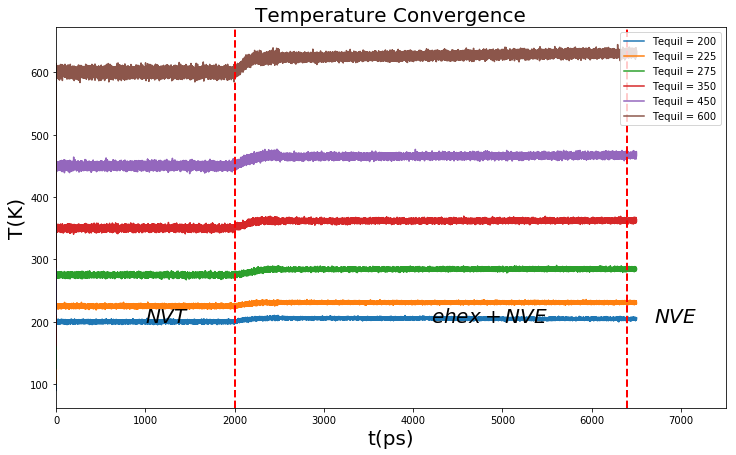

In [246]:
temperature = conv_P(**TEMP)
temperature.plot()

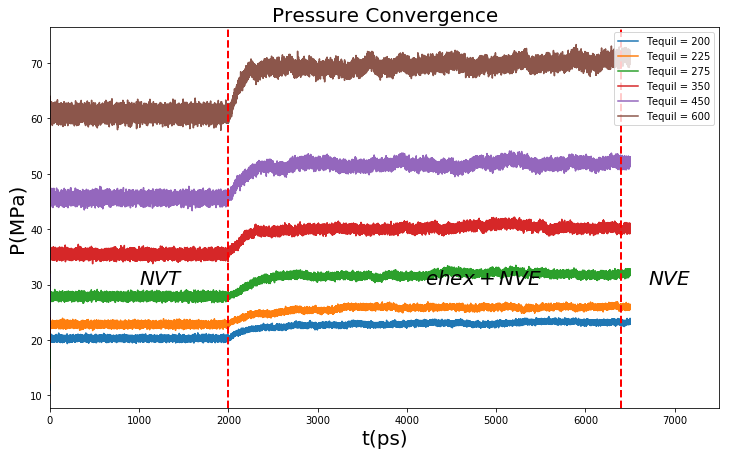

In [247]:
pressure = conv_P(**PRES)
pressure.plot()

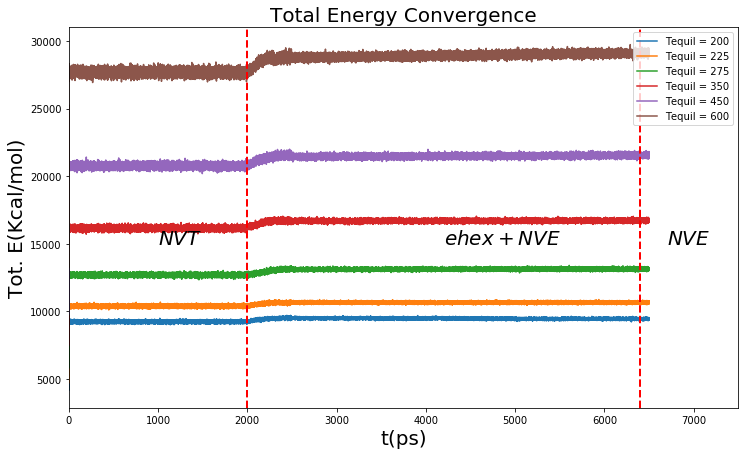

In [248]:
TotalEnergy = conv_P(**TE)
TotalEnergy.plot()

## 4. Density calculations

### 4.1 Density 2D with grid mesh

In [1]:
def density_3d(psf, dcd):
    import MDAnalysis
    from MDAnalysis.analysis.density import density_from_Universe
    import numpy as np
    
    u = MDAnalysis.Universe(psf, dcd)
    c6f = u.select_atoms("segid C6F")
    D = density_from_Universe(u, delta=0.5, atomselection="resname C6F", start=2000, stop =2500)
    Dxz = np.sum(D.grid, axis=1)
    nx, ny = np.shape(Dxz)
    x = np.linspace(-nx/2, nx/2-1, nx)
    y = np.linspace(-ny/2, ny/2-1, ny)
    X, Y = np.meshgrid(y, x)
    return X, Y, Dxz

In [2]:
def plot_density3d(index):
    from mpl_toolkits.mplot3d import Axes3D
    import pylab as plt
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator, FormatStrFormatter
    import numpy as np
    from mpl_toolkits.mplot3d.axes3d import get_test_data

    P = 1
    dQ = 0.003
    fig = plt.figure(figsize=(20,15))
    plt.clf()
    
    T = 200
    folder="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(index)
    ax = fig.add_subplot(3, 2, 1, projection='3d')
    psf = folder+'/inputFiles/c6fGra.psf'
    dcd = folder+'/outputFiles/c6fGra.dcd'
    X, Y, Z = density_3d(psf, dcd)
    
    surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_title('T = 200', fontsize=40)
    
    T = 225
    folder="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(index)
    ax = fig.add_subplot(3, 2, 2, projection='3d')
    psf = folder+'/inputFiles/c6fGra.psf'
    dcd = folder+'/outputFiles/c6fGra.dcd'
    X, Y, Z = density_3d(psf, dcd)
    
    surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_title('T = 225', fontsize=40)
    
    T = 275
    folder="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(index)
    ax = fig.add_subplot(3, 2, 3, projection='3d')
    psf = folder+'/inputFiles/c6fGra.psf'
    dcd = folder+'/outputFiles/c6fGra.dcd'
    X, Y, Z = density_3d(psf, dcd)
    
    surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_title('T = 275', fontsize=40)

    T = 350
    folder="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(index)
    ax = fig.add_subplot(3, 2, 4, projection='3d')
    psf = folder+'/inputFiles/c6fGra.psf'
    dcd = folder+'/outputFiles/c6fGra.dcd'
    X, Y, Z = density_3d(psf, dcd)
    
    surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_title('T = 350', fontsize=40)
    
    T = 450
    folder="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(index)
    ax = fig.add_subplot(3, 2, 5, projection='3d')
    psf = folder+'/inputFiles/c6fGra.psf'
    dcd = folder+'/outputFiles/c6fGra.dcd'
    X, Y, Z = density_3d(psf, dcd)
    
    surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_title('T = 450', fontsize=40)
    
    T = 600
    folder="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(index)
    ax = fig.add_subplot(3, 2, 6, projection='3d')
    psf = folder+'/inputFiles/c6fGra.psf'
    dcd = folder+'/outputFiles/c6fGra.dcd'
    X, Y, Z = density_3d(psf, dcd)
    
    surf = ax.plot_surface(X, Y, Z,
                       linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    ax.set_title('T = 600', fontsize=40)
    
    plt.show()

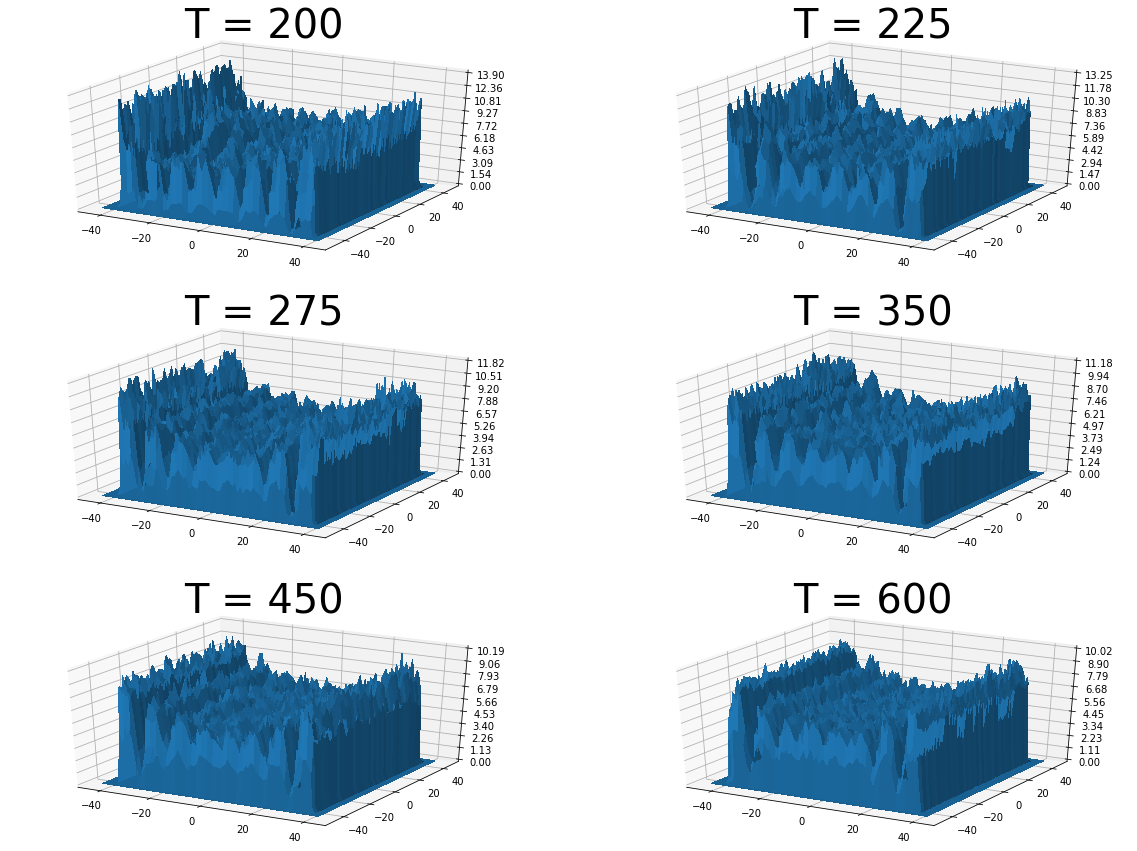

In [4]:
plot_density3d(1)

### 4.2 Density 1D with grid mesh

In [6]:
def density(psf, dcd):
    import MDAnalysis
    from MDAnalysis.analysis.density import density_from_Universe
    import numpy as np
    
    u = MDAnalysis.Universe(psf, dcd)
    c6f = u.select_atoms("segid C6F")
    D = density_from_Universe(u, delta=0.5, atomselection="resname C6F", start=2000, stop =2500)
    Dxz = np.sum(D.grid, axis=1)
    Dx = np.sum(Dxz, axis=1)
    Dz = np.sum(Dxz, axis=0)
    Dyz = np.sum(D.grid, axis=0)
    Dy = np.sum(Dyz, axis=1)
    x = np.linspace(1,np.size(Dx),np.size(Dx))
    y = np.linspace(1,np.size(Dy),np.size(Dy))
    z = np.linspace(1,np.size(Dz),np.size(Dz))
    
    return x, Dx, y, Dy, z, Dz

In [7]:
def plot_density(axis):
    import numpy as np
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(10,4))
    plt.clf()
    
    for T in 200, 225, 275, 350, 450, 600:
        index =3
        P = 1
        dQ = 0.003
        folder="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(index)
        psf = folder+'/inputFiles/c6fGra.psf'
        dcd = folder+'/outputFiles/c6fGra.dcd'
                    
        x, Dx, y, Dy, z, Dz = density(psf, dcd)
                    
        if (axis == "x"):
            plt.plot(x, Dx, label="T=%d"%(T))
            plt.legend()
        elif (axis == "y"):
            plt.plot(y, Dy, label="T=%d"%(T))
            plt.legend()
        else:
            plt.plot(z, Dz, label="T=%d"%(T))
            plt.legend()
    plt.show()

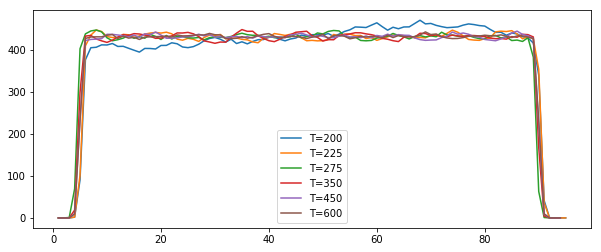

In [310]:
plot_density("x")

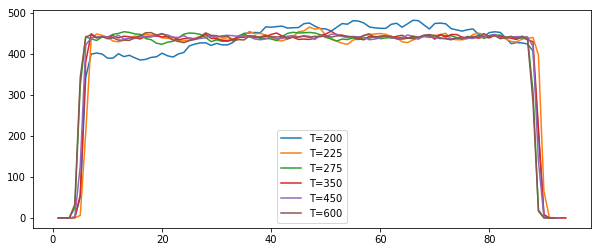

In [311]:
plot_density("y")

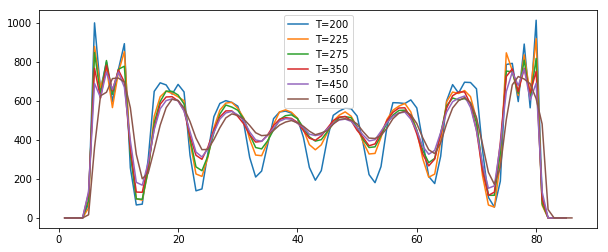

In [312]:
plot_density("z")

### 4.3 Smoothing the density data

In [27]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

def plot_Sdensity(axis, sw):
    fig=plt.figure(figsize=(10,4))
    plt.clf()
    win = signal.hann(sw)
    
    for T in 200, 225, 275, 350, 450, 600:
        index =3
        P = 1
        dQ = 0.003
        folder="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(index)
        psf = folder+'/inputFiles/c6fGra.psf'
        dcd = folder+'/outputFiles/c6fGra.dcd'
                    
        x, Dx, y, Dy, z, Dz = density(psf, dcd)
        Dx = signal.convolve(Dx, win, mode='same') / sum(win)      
        Dy = signal.convolve(Dy, win, mode='same') / sum(win)      
        Dz = signal.convolve(Dz, win, mode='same') / sum(win)      
        
        if (axis == "x"):
            plt.plot(x, Dx, label="T=%d"%(T))
            plt.legend()
        elif (axis == "y"):
            plt.plot(y, Dy, label="T=%d"%(T))
            plt.legend()
        else:
            plt.plot(z, Dz, label="T=%d"%(T))
            plt.legend()
    plt.show()

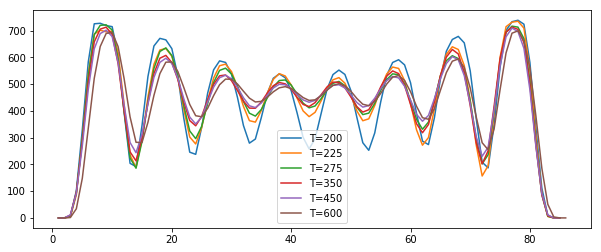

In [28]:
plot_Sdensity("z", 7)

### 4.4 Density 1D with bins (tcl)

In [395]:
def plot_dens(index, axis):
    import numpy as np
    import matplotlib.pyplot as plt
    import subprocess
    
    fig=plt.figure(figsize=(10,4))
    plt.clf()
    
    for T in 200, 225, 275, 350, 450, 600:
        P = 1
        dQ = 0.003
        fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(index)+"_avg-den.dat"
        path='./analysisBase_prof/'+fname
        data = np.loadtxt(path)
        iBin = data[:,0]
        denx = data[:,1]
        deny = data[:,2]
        denz = data[:,3]
        sdx = data[:,4]
        sdy = data[:,5]
        sdz = data[:,6]
                
        if (axis == "x"):
            plt.plot(iBin, denx, label='T = %d'%T)
            plt.legend()
        elif (axis == "y"):
            plt.plot(iBin, deny, label='T = %d'%T)
            plt.legend()
        else:
            plt.plot(iBin, denz, label='T = %d'%T)
            plt.legend()
        plt.legend()
    plt.show()

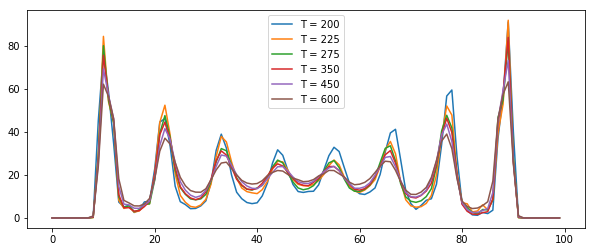

In [397]:
plot_dens(1, "z")

### 4.5 Average density 1D with bins (tcl)

In [398]:
def plot_Adens(axis):
    import numpy as np
    import matplotlib.pyplot as plt
    import subprocess
    
    fig=plt.figure(figsize=(10,4))
    plt.clf()
    
    for T in 200, 225, 275, 350, 450, 600:
        #proc = subprocess.Popen("wc -l ./analysisBase_prof/T200P1_dQ0.003_1_avg-den.dat", shell=True, stdout=subprocess.PIPE)
        proc = subprocess.Popen(["wc", "-l", "./analysisBase_prof/T200P1_dQ0.003_1_avg-den.dat"], stdout=subprocess.PIPE)
        
        #Getting the number of lines in file 
        n = int(proc.stdout.read().split(' ', 1)[0]) 
        
        D=np.zeros((n,3))
        for index in 1, 2, 3:
            P = 1
            dQ = 0.003
            fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(index)+"_avg-den.dat"
            path='./analysisBase_prof/'+fname
            data = np.loadtxt(path)
            iBin = data[:,0]
            denx = data[:,1]
            deny = data[:,2]
            denz = data[:,3]
            sdx = data[:,4]
            sdy = data[:,5]
            sdz = data[:,6]
        D[:,0] += denx
        D[:,1] += deny
        D[:,2] += denz
        D /= 3
        
        if (axis == "x"):
            plt.plot(iBin, D[:,0], label='T = %d'%T)
            plt.legend()
        elif (axis == "y"):
            plt.plot(iBin, D[:,1], label='T = %d'%T)
            plt.legend()
        else:
            plt.plot(iBin, D[:,2], label='T = %d'%T)
            plt.legend()
        plt.legend()
    plt.show()

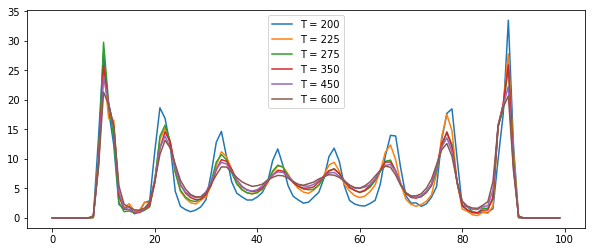

In [399]:
plot_Adens("z")

### 4.6 Smoothing average desnity data (tcl)

In [35]:
def plot_SAdens(axis):
    import numpy as np
    import matplotlib.pyplot as plt
    import subprocess
    from scipy import signal
    
    fig=plt.figure(figsize=(10,4))
    plt.clf()
    win = signal.hann(11)
    
    for T in 200, 225, 275, 350, 450, 600:
        #proc = subprocess.Popen("wc -l ./analysisBase_prof/T200P1_dQ0.003_1_avg-den.dat", shell=True, stdout=subprocess.PIPE)
        proc = subprocess.Popen(["wc", "-l", "./analysisBase_prof/T200P1_dQ0.003_1_avg-den.dat"], stdout=subprocess.PIPE)
        
        #Getting the number of lines in file 
        n = int(proc.stdout.read().split(' ', 1)[0]) 
        
        D=np.zeros((n,3))
        for index in 1, 2, 3:
            P = 1
            dQ = 0.003
            fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(index)+"_avg-den.dat"
            path='./analysisBase_prof/'+fname
            data = np.loadtxt(path)
            iBin = data[:,0]
            denx = data[:,1]
            deny = data[:,2]
            denz = data[:,3]
            sdx = data[:,4]
            sdy = data[:,5]
            sdz = data[:,6]
        D[:,0] += denx
        D[:,0] = signal.convolve(D[:,0], win, mode='same') / sum(win)      
        D[:,1] += deny
        D[:,1] = signal.convolve(D[:,1], win, mode='same') / sum(win)
        D[:,2] += denz
        D[:,2] = signal.convolve(D[:,2], win, mode='same') / sum(win)
        D /= 3
        
        if (axis == "x"):
            plt.plot(iBin, D[:,0], label='T = %d'%T)
            plt.legend()
        elif (axis == "y"):
            plt.plot(iBin, D[:,1], label='T = %d'%T)
            plt.legend()
        else:
            plt.plot(iBin, D[:,2], label='T = %d'%T)
            plt.legend()
        plt.legend()
    plt.show()

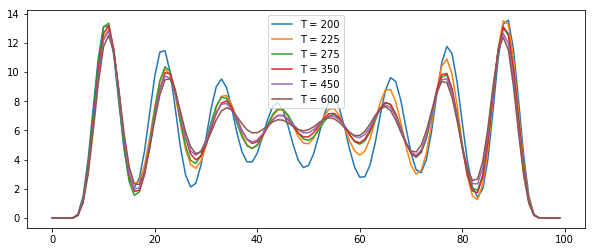

In [36]:
plot_SAdens("z")

### 4.7 First Hydration layer density

In [209]:
def density_3d(psf, dcd):
    import MDAnalysis
    from MDAnalysis.analysis.density import density_from_Universe
    import numpy as np
    
    u = MDAnalysis.Universe(psf, dcd)
    c6f = u.select_atoms("segid C6F")
    D = density_from_Universe(u, delta=0.5, atomselection="resname C6F", start=2000, stop =2500)
    D.grid[:,:,16:] = 0
    Dxz = np.sum(D.grid, axis=1)
    nx, ny = np.shape(Dxz)
    x = np.linspace(-nx/2, nx/2-1, nx)
    y = np.linspace(-ny/2, ny/2-1, ny)
    X, Y = np.meshgrid(y, x)
    return X, Y, Dxz

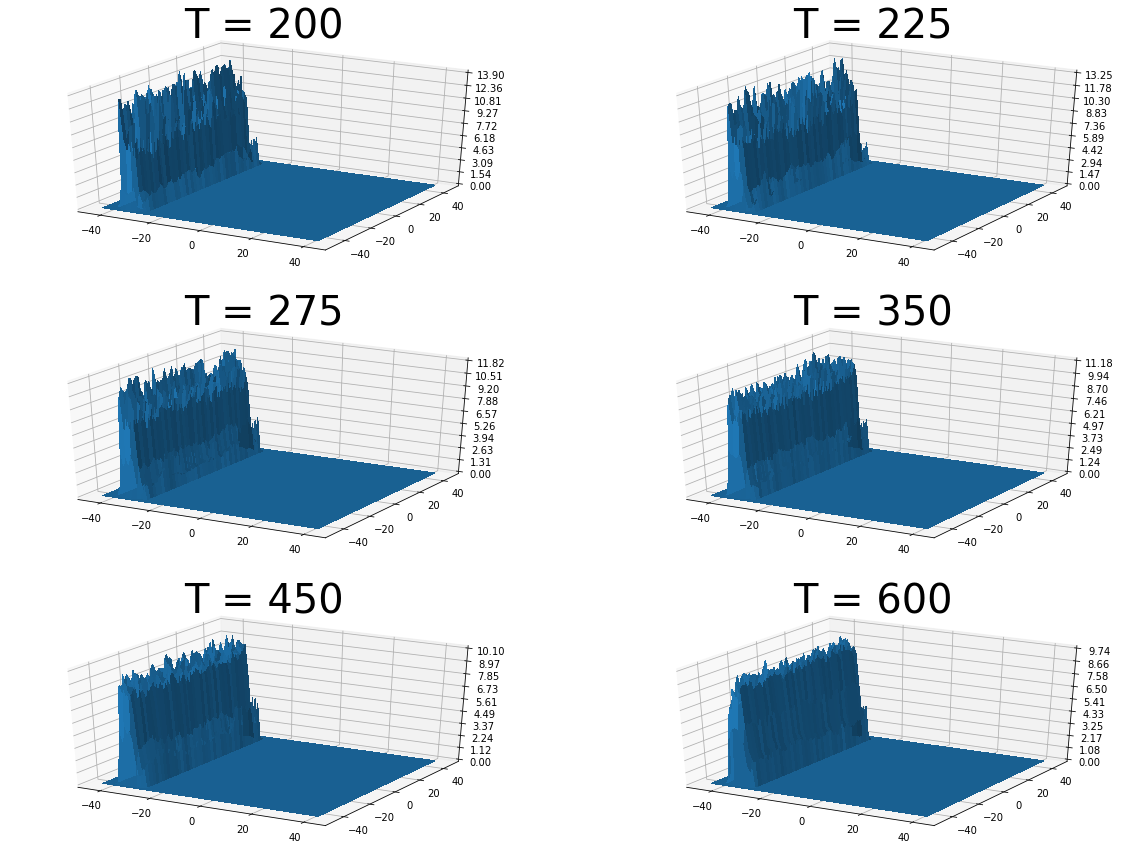

In [210]:
plot_density3d(1)

In [3]:
def plot_density_fhyd():
    import MDAnalysis
    from MDAnalysis.analysis.density import density_from_Universe
    import pylab as plt
    import numpy as np
    
    fig=plt.figure(figsize=(10, 8))
    
    Temp = np.array([200, 225, 275, 350, 450, 600])
    index = np.array([1, 2, 3])
    rho = np.zeros((np.size(Temp), np.size(index)))
    rho_c = np.zeros((np.size(Temp), np.size(index)))
    rho_f = np.zeros((np.size(Temp), np.size(index)))
    i=0
    for T in Temp:
        j=0
        for ind in index:
            P = 1
            dQ = 0.003
            folder="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(ind)
            psf = folder+'/inputFiles/c6fGra.psf'
            dcd = folder+'/outputFiles/c6fGra.dcd'
            u = MDAnalysis.Universe(psf, dcd)
            c6f = u.select_atoms("segid C6F")
            c = u.select_atoms("type C1T C2T C3T")
            f = u.select_atoms("type F1T F2T F3T")
            D_tot = density_from_Universe(u, delta=0.5, atomselection="resname C6F", start=2000, stop =2500)
            D_c = density_from_Universe(u, delta=0.5, atomselection="type C1T C2T C3T", start=2000, stop =2500)
            D_f = density_from_Universe(u, delta=0.5, atomselection="type F1T F2T F3T", start=2000, stop =2500)
            D_tot.grid[:,:,16:] = 0
            D_c.grid[:,:,16:] = 0
            D_f.grid[:,:,16:] = 0
            rho[i,j] = np.sum(D_tot.grid)
            rho_c[i,j] = np.sum(D_c.grid)
            rho_f[i,j] = np.sum(D_f.grid)
            j+=1
        i+=1
    rho_avg=np.mean(rho, axis=1)
    rho_std=np.mean(rho, axis=1)
    
    rhoc_avg=np.mean(rho_c, axis=1)
    rhoc_std=np.mean(rho_c, axis=1)
    
    rhof_avg=np.mean(rho_f, axis=1)
    rhof_std=np.mean(rho_f, axis=1)

    plt.xlabel('T(K)')
    plt.title('First hydration layer density')
    width=0.35
    xpos=np.arange(np.size(Temp))
    
    p1=plt.bar(xpos, rhoc_avg, width)#, yerr=rhoc_std)
    p2=plt.bar(xpos, rhof_avg, width, bottom=rhoc_avg)#, yerr=rhof_std)
    
    plt.xticks(xpos, ('200', '225', '275', '350', '450', '600'))
    plt.legend((p1[0], p2[0]), ('C', 'F'))

    plt.show()
    

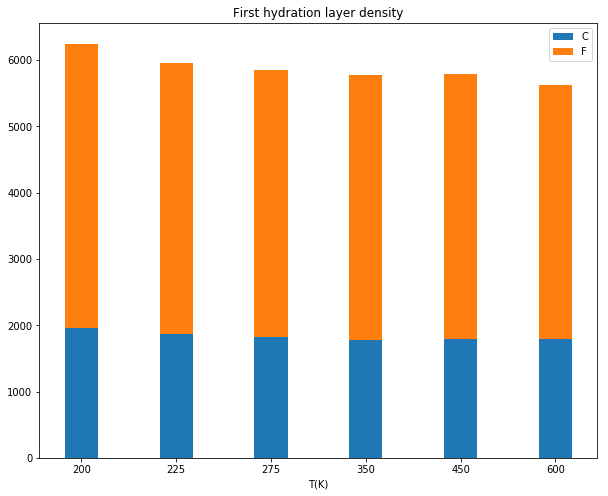

In [5]:
plot_density_fhyd()

## 5. Carrier density spectral overlap

### 5.1 Comparing DOS at different temperature for graphene and perfluorohexane

In [416]:
def plot_dos():
    import numpy as np
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(22, 10))
    plt.clf()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    i=1
    for case in 'graL', 'graB', 'pfL', 'pfB':
        for T in 200, 225, 275, 350, 450, 600:
            P = 1
            dQ = 0.003
            fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_DOS_"+case+".dat"
            path='./analysisBase_dos/'+fname
            DOS = np.loadtxt(path)
            freq = np.loadtxt("./analysisBase_dos/freq.dat")
            
            ax = fig.add_subplot(2, 2, i)
            ax.set_title(case, fontsize=40)
            ax.plot(freq, DOS, label="T=%d"%(T))
            ax.legend()
        i += 1
        
    plt.show()
    

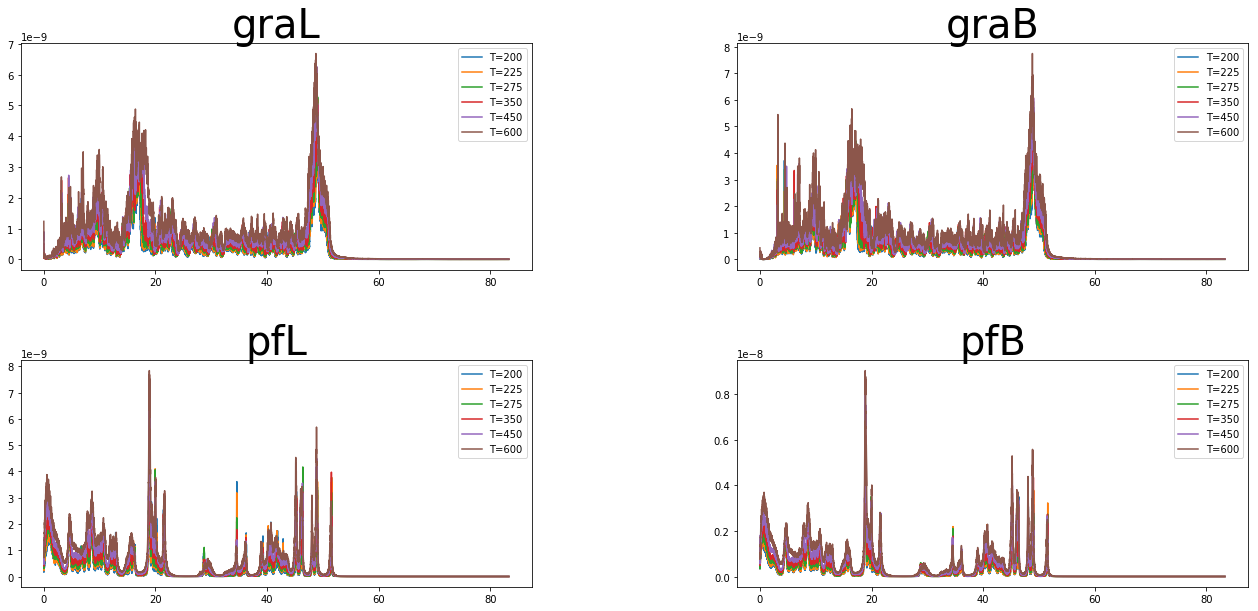

In [417]:
plot_dos()

### 5.2 Comparing Graphene bulk and interface

In [431]:
def plot_dos():
    import numpy as np
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(22,10))
    plt.clf()

    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    i=1
    for T in 200, 225, 450, 600:
        for case in "graL", "graB":
            P = 1
            dQ = 0.003
            fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_DOS_"+case+".dat"
            path='./analysisBase_dos/'+fname
            DOS = np.loadtxt(path)
            freq = np.loadtxt("./analysisBase_dos/freq.dat")
            ax = fig.add_subplot(2, 2, i)
            ax.set_title('T = %d'%T, fontsize=40)
            ax.plot(freq, DOS, label="case=%s"%(case))
            ax.legend()
        i+=1
    plt.show()

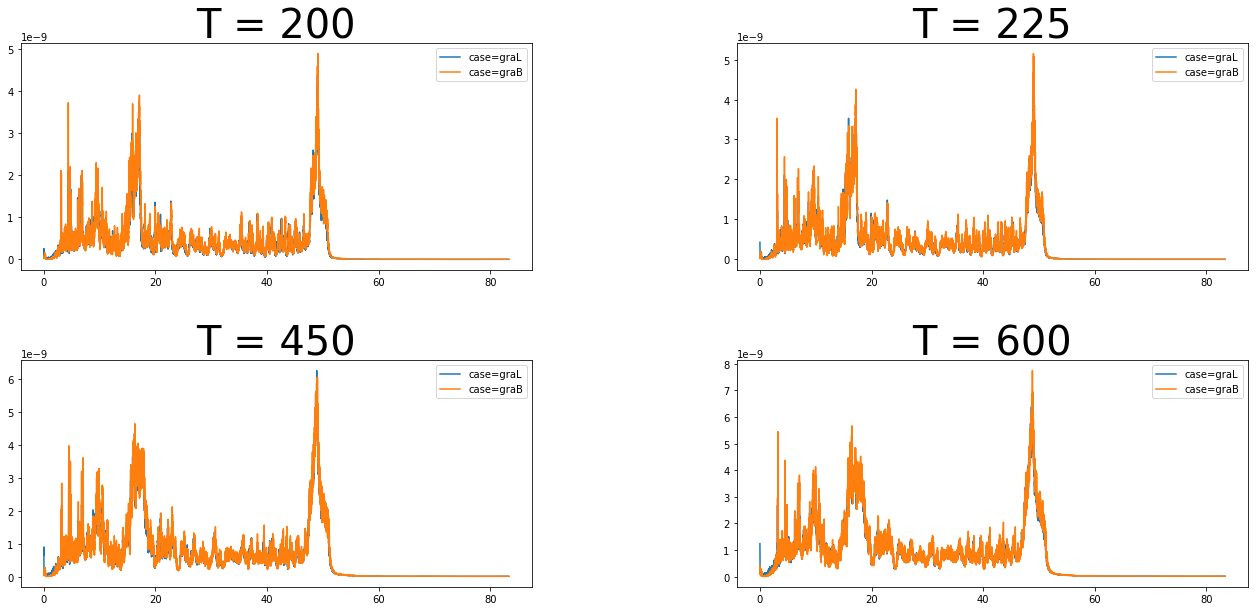

In [432]:
plot_dos()

### 5.3 Comparing Perfluorohexane bulk and interface

In [425]:
def plot_dos():
    import numpy as np
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(22,10))
    plt.clf()
    
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    i=1
    for T in 200, 275, 450, 600:
        for case in "pfL", "pfB":
            P = 1
            dQ = 0.003
            fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_DOS_"+case+".dat"
            path='./analysisBase_dos/'+fname
            DOS = np.loadtxt(path)
            freq = np.loadtxt("./analysisBase_dos/freq.dat")
            ax = fig.add_subplot(2, 2, i)
            ax.set_title('T = %d'%T, fontsize=40)
            ax.plot(freq, DOS, label="case=%s"%(case))
            ax.legend()
        i+=1
    plt.show()

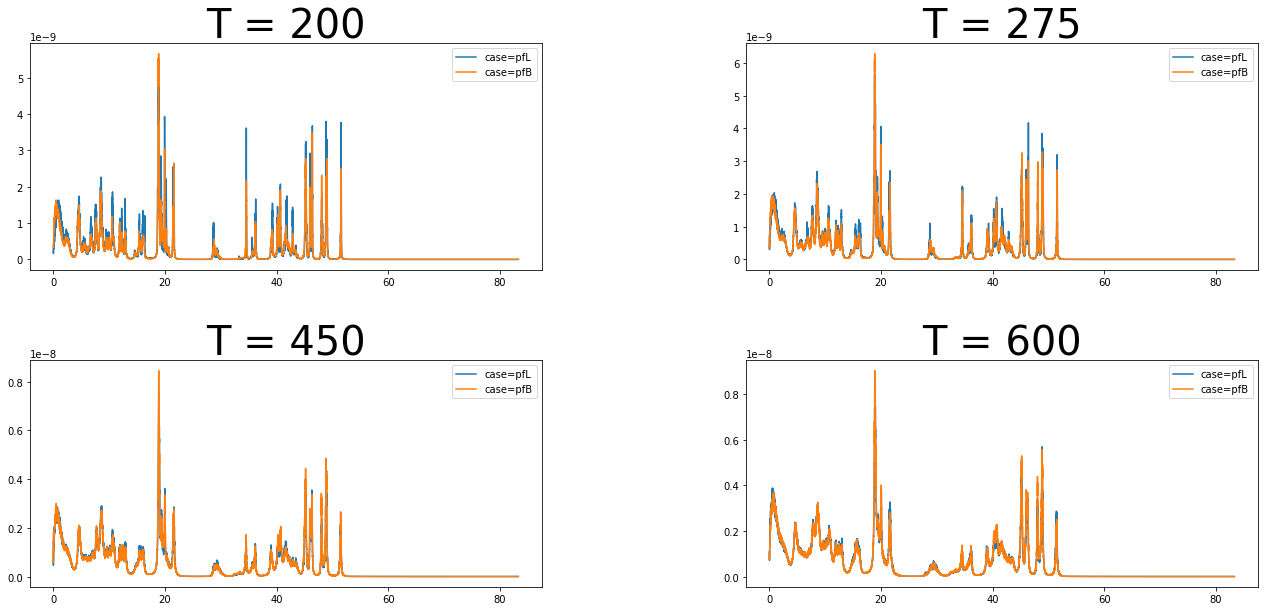

In [426]:
plot_dos()

### 5.4 Increase in DOS with temperature

In [3]:
def plot_Spoly():
    import numpy as np
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(10,4))
    
    Temp = np.array([200, 225, 275, 350, 450, 600])
    index = np.array([1, 2, 3])
    S = np.zeros((np.size(Temp), np.size(index)))
    j=0
    for T in Temp:
        k = 0
        for ind in index:
            f = np.zeros(2)
            i=0
            for case in "pfL", "pfB":
                P = 1
                dQ = 0.003
                fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(ind)+"_DOS_"+case+".dat"
                path='./analysisBase_dos/'+fname
                DOS = np.loadtxt(path)
                freq = np.loadtxt("./analysisBase_dos/freq.dat")
                f[i] = np.trapz(DOS[:,1],freq)
                i+=1        
            S[j, k] = f[1]-f[0]
            k+=1
        j+=1
    S_avg = np.mean(S, axis=1)
    S_std = np.std(S, axis=1)
    coeffs = np.polyfit(Temp, S_avg, 1)
    f_x = np.poly1d(coeffs)
    #plt.plot(Temp, S_avg, '^', label="Overlap")
    plt.errorbar(Temp, S_avg, yerr=S_std, fmt='^', markersize='10', markerfacecolor='w' ,markeredgecolor='g', ecolor='g',capsize=4, elinewidth=2)
    plt.plot(Temp, f_x(Temp), '--', color='g')
    plt.legend()
    plt.show()

#### Linear Fit

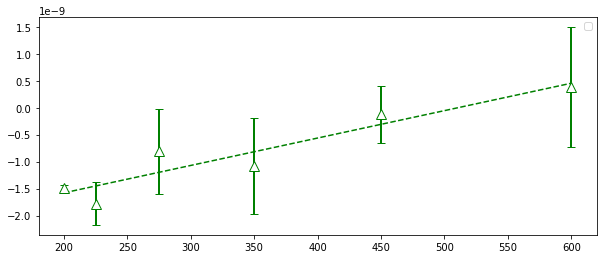

In [4]:
plot_Spoly()

#### Exponential fit

In [198]:
def plot_Sexp():
    import numpy as np
    from scipy.optimize import curve_fit
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(10,4))
    plt.clf()
    
    Temp = np.array([200, 225, 275, 350, 450, 600])
    index = np.array([1, 2, 3])
    S = np.zeros((np.size(Temp), np.size(index)))
    j=0
    for T in Temp:
        k = 0
        for ind in index:
            f = np.zeros(2)
            i=0
            for case in "pfL", "pfB":
                P = 1
                dQ = 0.003
                fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(ind)+"_DOS_"+case+".dat"
                path='./analysisBase_dos/'+fname
                DOS = np.loadtxt(path)
                freq = np.loadtxt("./analysisBase_dos/freq.dat")
                f[i] = np.trapz(DOS[:,1],freq)
                i+=1        
            S[j,k] = f[0]-f[1]
            k+=1
        j+=1
    S_avg = np.mean(S, axis=1)
    S_std = np.std(S, axis=1)
    def func(x, a, b, c):
        #return a * np.exp(-b * x) + c
        return  c + a/(x+b)
    popt, pcov = curve_fit(func, Temp, S_avg)
    #plt.plot(Temp, S, '^', label="Overlap")
    plt.errorbar(Temp, S_avg, yerr=S_std, fmt='^', markerfacecolor='w', markeredgecolor='r', markersize='10', capsize =4,ecolor ='r', elinewidth=2)
    plt.plot(Temp, func(Temp, *popt), '--', label='optimal', color='r')
    plt.legend()
    plt.show()
    print popt

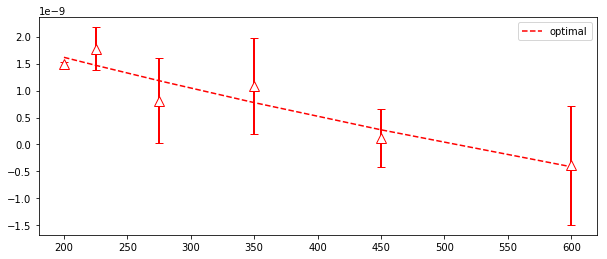

[ 3.07765715e-05  2.07155061e+03 -1.19332462e-08]


In [199]:
plot_Sexp()

## 6. Temperature Gradient 

###  6.1 Calculated Gradient

#### Class Material and TwoDMaterial

In [340]:
import sys
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

class Material(object):
        
    def __init__(self,*args,**kwargs):
        
        nMol= args[0]
        atPmol= args[1]
        
        for key,value in kwargs.items():
            setattr(self,key,value)
            #print "Setting the variable "+key+"="+str(value)+"."
            
        if hasattr(self, 'Wz_i'):
            Wz_i=self.Wz_i
            Wz_f=self.Wz_f
        units=self.units
        
        if units=='real':
            self.k_B =1.38064852e-23
            self.A2m =1.0e-10
            kCal2Joule=4184
            mol2atom=6.02214179e23
            self.E_real2SI=kCal2Joule/mol2atom
            self.fs2s=1.0e-15
            self.A=((30*30)*self.A2m*self.A2m)  #area(sq. meter)
        else:
            if units=='metal':
                self.k_B =1.38064852e-23
                self.A2m =1.0e-10
                eV2Joule=1.60218e-19
                mol2atom=6.02214179e23
                self.E_real2SI=eV2Joule/mol2atom
                self.fs2s=1.0e-15
                self.A=((30*30)*self.A2m*self.A2m)  #area(sq. meter)
            else:
                print("Units sepcification Error.")
                sys.exit(1)
        self.nAtom=nMol*atPmol
        
        if hasattr(self, 'Wz_i'):
            Wz_range=Wz_f-Wz_i
            Wdz=Wz_range/40
            self.z=np.arange(Wz_i,Wz_f+Wdz,Wdz)
            self.lz=np.size(self.z)
            self.W_bindens=np.zeros(self.lz-1)
            self.Tw=np.zeros(self.lz-1)
    
    def CalcCentreBins(self):
        Wz_centre=np.zeros(self.lz-1)
        for i in range (self.lz-1):
            Wz_centre[i]=0.5*(self.z[i+1]-self.z[i])
        return Wz_centre
    
    def ReadDumpFile(self,tstep,prodRun,dmpfreq,ncols,fname):
        dmpfile=fname
        f=open(dmpfile,"r")
        timeStep=tstep        #fs
        dumpFreq=dmpfreq
        prodRun=prodRun
        skipval=10000
        self.nTstepDat=nTstepDat=prodRun/(dumpFreq*timeStep)
        self.iStart=iStart=skipval/(dumpFreq*timeStep)
        nAtom=self.nAtom
        F_data=np.zeros((nTstepDat,nAtom,ncols))
        F_data_prime=np.zeros((nAtom,ncols))
        F_data_sum=np.zeros(nAtom)
        #print "nAtom = ", nAtom
   
        for t in range (nTstepDat):
            for i in range(9):
                lineF=f.readline()
            for i in range(nAtom):
                F_tmp=f.readline()
                F_tempp=F_tmp.split()
                F_tempp=np.array(map(float, F_tempp))
                F_data_prime[i,:]=F_tempp

            F_data_prime=F_data_prime[F_data_prime[:,0].argsort()]
            if t>=iStart:
                F_data_sum=F_data_sum+F_data_prime[:,3]
    
            F_data[t,:,:]=F_data_prime[:,:]
        
        self.F_data=F_data
        self.F_data_sum=F_data_sum
        
    def calcTemp(self):
        lz=self.lz
        z=self.z
        nAtom=self.nAtom
        nTstepDat=self.nTstepDat
        iStart=self.iStart
        F_data=self.F_data
        
        for t in range (nTstepDat):
            if t>=iStart:
                binsW=np.zeros(lz-1)
                kebinW=np.zeros(lz-1)
                for n in range (self.nAtom):
                    count=0
                    for k in range (lz-1):
                        if F_data[t,n,6] <= z[k+1] and F_data[t,n,6] >= z[k]:
                            count=count+1
                            binsW[k]=binsW[k]+1
                            kebinW[k]=kebinW[k]+F_data[t,n,3]
                            break

                self.W_bindens=self.W_bindens+binsW
                self.Tw=self.Tw+(kebinW/(binsW))
        
        #Obtaining average ke and water temperature
        self.Tw=(self.Tw*self.E_real2SI)/((3.0/2.0)*self.k_B*(nTstepDat-iStart))
        return self.Tw

class TwoDMaterial(Material):
    def __init__(self, *args):
        self.nSheetsL=args[0]
        self.nSheetsR=args[1]
        self.nSheet=self.nSheetsL+self.nSheetsR
        self.basisGra=args[2]
        self.units=args[3]
        super(TwoDMaterial, self).__init__(self.nSheet, self.basisGra, units=self.units)
        
    def calcTemp(self):
        nAtom=self.nAtom
        iStart=self.iStart
        nTstepDat=self.nTstepDat
        F_data=self.F_data
        F_data_sum=self.F_data_sum
        
        Tm=np.zeros(nAtom)
        typeMat=np.zeros(nAtom)

        F_data_sum=(F_data_sum*self.E_real2SI)/(nTstepDat-iStart)
        for i in range (nAtom):
            Tm[i]=F_data_sum[i]/((1.5)*self.k_B)
            typeMat[i]=F_data[0,i,2]

        #Determining atoms in same sheet of Graphene
        T_matL=np.zeros(self.nSheetsL)
        T_matR=np.zeros(self.nSheetsR)
        countL=np.zeros(self.nSheetsL)
        countR=np.zeros(self.nSheetsR)
        for i in range(nAtom):
            if typeMat[i] <= 14:
                if typeMat[i] == 1:
                    sheet=0
                else:
                    sheet=int(typeMat[i]-7)
                T_matL[sheet]=T_matL[sheet]+Tm[i]
                countL[sheet]=countL[sheet]+1
            else:
                sheet=int(typeMat[i]-(7+self.nSheetsL))
                T_matR[sheet]=T_matR[sheet]+Tm[i]
                countR[sheet]=countR[sheet]+1
        
        T_matL=T_matL/countL
        T_matL=T_matL[::-1]
        T_matR=T_matR/countR
        
        return T_matL, T_matR

#### plotting function

In [393]:
import sys
import numpy as np
import pylab as plt
np.seterr(divide='ignore', invalid='ignore')
import linecache as l


def plot_Sgradtemp(index):
    fig = plt.figure(figsize=(10,15))
    plt.clf()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    i=1
    for T in 200, 225, 275, 350, 450, 600:
        T_graL, Tw, T_graR = prep_gradtemp(T, index)
        x_left, x_mid, x_right = setX() 
        x_left, T_graL, x_mid, Tw, x_right, T_graR = cutXT(x_left,T_graL,x_mid,Tw,x_right,T_graR)

        pL=np.poly1d(np.polyfit(x_left,T_graL,1))
        pmid=np.poly1d(np.polyfit(x_mid,Tw,1))
        pR=np.poly1d(np.polyfit(x_right,T_graR,1))
        
        ax = fig.add_subplot(3, 2, i)
        i+=1
        ax.set_title("T = %d"%T, fontsize=40)
        ax.set_xlabel("z(A)")
        ax.set_ylabel("T(K)")
        ax.set_ylim(0,T+300)
        ax.plot(x_left,pL(x_left),'.',x_mid,pmid(x_mid),'.',x_right,pR(x_right),'.')
        x=np.concatenate([x_left,x_mid,x_right],axis=0)
        p=np.concatenate([pL(x_left),pmid(x_mid),pR(x_right)],axis=0)
        #np.savetxt('smoothGrad'+str(T)+'.dat', np.column_stack((x,p)))
    plt.show()
    
def plot_tempgrad(index):
    fig = plt.figure(figsize=(10,15))
    plt.clf()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    i=1
    for T in 200, 225, 275, 350, 450, 600:
        T_graL, Tw, T_graR = prep_gradtemp(T, index)
        x_left, x_mid, x_right = setX()
        TempGrad=np.concatenate((T_graL,Tw,T_graR),axis=0)
        N=np.size(TempGrad)
        x=np.concatenate((x_left,x_mid,x_right),axis=0)
        N_prime=np.size(x)
        
        iindex=[0,8,9,N-9,N-10,N-1]
        x=np.delete(x, iindex, axis=0)
        TempGrad=np.delete(TempGrad, iindex, axis=0)

        ax = fig.add_subplot(3, 2, i)
        ax.set_title("T = %d"%T, fontsize=40)
        ax.set_xlabel("z(A)")
        ax.set_ylabel("T(K)")
        ax.set_ylim(0,T+300)
        if N != N_prime:
            print ("Size mismatch N is ",N,"N_prime is ",N_prime)
            sys.exit()
        else:
            ax.plot(x,TempGrad,'.')
            #np.savetxt('tempGrad'+str(T)+'.dat', np.column_stack((x,TempGrad)))
        x_left, T_graL, x_mid, Tw, x_right, T_graR = cutXT(x_left,T_graL,x_mid,Tw,x_right,T_graR)

        pL=np.poly1d(np.polyfit(x_left,T_graL,1))
        pmid=np.poly1d(np.polyfit(x_mid,Tw,1))
        pR=np.poly1d(np.polyfit(x_right,T_graR,1))
        ax.plot(x_left,pL(x_left),'-',x_mid,pmid(x_mid),'-', x_right,pR(x_right),'-')
        i+=1
    plt.show()
    
def plot_G():
    fig = plt.figure(figsize=(10,4))
    T, GL, GR = calcthermal()
    GL_avg = np.mean(GL, axis=0)
    GR_avg = np.mean(GR, axis=0)
    GL_std = np.std(GL, axis=0)
    GR_std = np.std(GR, axis=0)
    plt.xlabel('T(K)')
    plt.ylabel('G(W/m2K)')
    plt.title('Thermal Conductance')
    #plt.plot(T, G_avg)
    plt.errorbar(T, GL_avg, yerr=GL_std, fmt='-o', label='left')
    plt.errorbar(T, GR_avg, yerr=GR_std, fmt='-o', label='right')
    plt.show()
    
def prep_gradtemp(T, index):   
    P=1
    dQ=0.003
    folder="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(index)
    path=folder+'/outputFiles/'
    units='real'
    atomPerMol=1
    lb_Wbox=1.5
    up_Wbox=41.5
    
    timeStep=1
    prodRun=100000
    dmpfreq=100
    ncols=7
    fname=path+'dmpC6f.dat'
    nC6f = int(l.getline(fname, 4))
    c6f = Material(nC6f,atomPerMol,Wz_i=lb_Wbox,Wz_f=up_Wbox,units=units)
    CentreBins=c6f.CalcCentreBins()
    c6f.ReadDumpFile(timeStep,prodRun,dmpfreq,ncols,fname)
    Tw=c6f.calcTemp()
    del c6f
   
    nSL=8
    nSR=8
    fname=path+'dmpGnc.dat'
    basis = int(l.getline(fname, 4))/(nSL+nSR)
    graphene=TwoDMaterial(nSL,nSR,basis,units)
    graphene.ReadDumpFile(timeStep,prodRun,dmpfreq,ncols,fname)
    T_graL, T_graR = graphene.calcTemp()
    del graphene
    
    return T_graL, Tw, T_graR

    
def setX():
    gap=3.84
    x_left=np.linspace(gap,gap*8,num=8)
    x_mid=np.linspace(gap*8+1,gap*8+40,num=40)
    x_right=np.linspace(gap*8+41,gap*8+41+gap*8,num=8)
    return x_left, x_mid, x_right

def cutXT(x_left, T_graL, x_mid, Tw, x_right, T_graR):
    x_left=np.delete(x_left, [0], axis=0)
    n=np.size(x_right)
    x_right=np.delete(x_right, [n-1], axis=0)
    n=np.size(x_mid)
    x_mid=np.delete(x_mid,[0,1,n-2,n-1])

    T_graL=np.delete(T_graL, [0], axis=0)
    n=np.size(T_graR)
    T_graR=np.delete(T_graR, [n-1], axis=0)
    n=np.size(Tw)
    Tw=np.delete(Tw,[0,1,n-2,n-1])
    return x_left, T_graL, x_mid, Tw, x_right, T_graR

def calcthermal():
    i=0
    Temp = np.array([200, 225, 275, 350, 450])
    GL = np.zeros((3, np.size(Temp)))
    GR = np.zeros((3, np.size(Temp)))
    for T in Temp:
        j=0
        for index in 1, 2, 3:
            T_graL, Tw, T_graR = prep_gradtemp(T, index)
            x_left, x_mid, x_right = setX()
            x_left, T_graL, x_mid, Tw, x_right, T_graR = cutXT(x_left,T_graL,x_mid,Tw,x_right,T_graR)
        
            kCal2Joule=4184
            mol2atom=6.02214179e23
            E_real2SI=kCal2Joule/mol2atom
            fs2s=1.0e-15
            A2m =1.0e-10
            A=((30*30)*A2m*A2m)  #area(sq. meter)
            gap=3.84

            slope_TgraL, c_TgraL=np.polyfit(x_left,T_graL,1)
            slope_Tw, c_Tw=np.polyfit(x_mid,Tw,1)
            slope_TgraR, c_TgraR=np.polyfit(x_right,T_graR,1)
            Q_flux=((0.003*E_real2SI)/(A*fs2s)) #Watts per mole per unit area

            k_graL=-(Q_flux/(slope_TgraL))*A2m
            k_W=-(Q_flux/(slope_Tw))*A2m
            k_graR=-(Q_flux/(slope_TgraR))*A2m

            x_intL=gap*8
            x_intLw=gap*8+1
            x_intR=gap*8+41
            x_intRw=gap*8+40

            Tint_lGra=slope_TgraL*x_intL+c_TgraL
            Tint_lWat=slope_Tw*x_intLw+c_Tw
            Tint_rWat=slope_Tw*x_intRw+c_Tw
            Tint_rGra=slope_TgraR*x_intR+c_TgraR

            G_L=Q_flux/((Tint_lGra-Tint_lWat))
            G_R=Q_flux/((Tint_rWat-Tint_rGra))
            GL[j,i] = G_L
            GR[j,i] = G_R
            j+=1
        i+=1
    return Temp, GL, GR
        #np.savetxt('thermalCond.dat',np.vstack(([k_graL, k_W, k_graR])))      #W/mK
        #np.savetxt('boundaryCond.dat', np.vstack((G_L*1e-6, G_R*1e-6)))       #MW/m2K
    

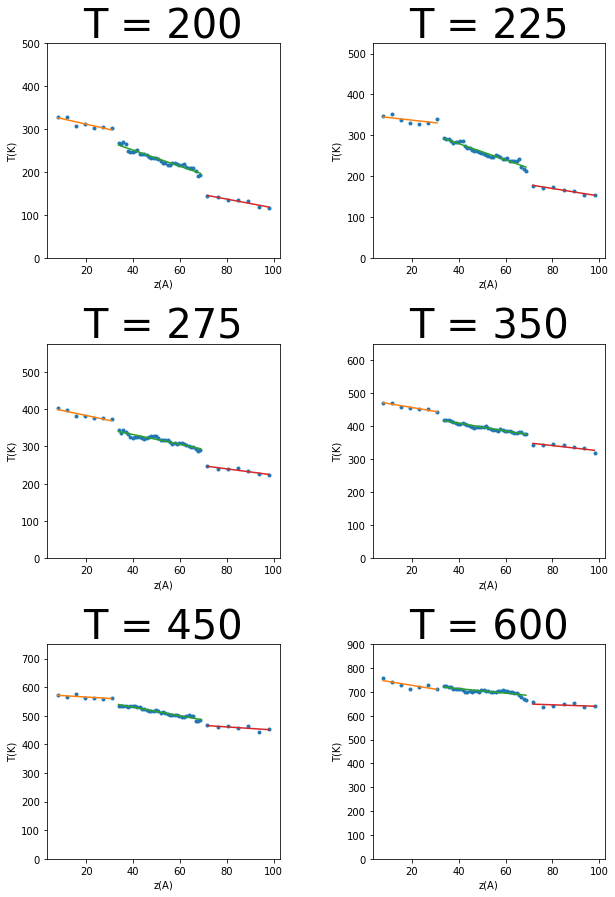

In [364]:
plot_tempgrad(1)

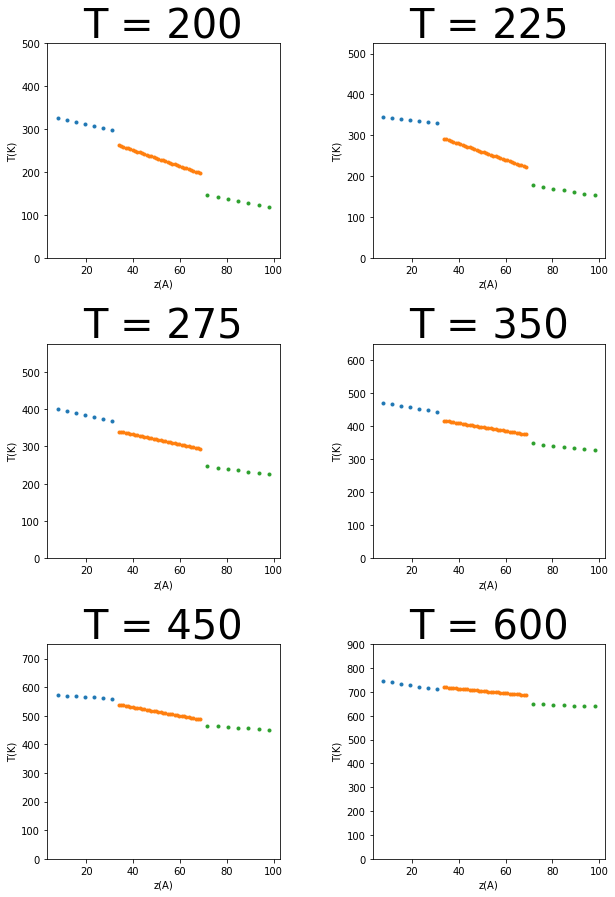

In [365]:
plot_Sgradtemp(1)

### 6.2 Gradient from saved data

In [106]:
def plot_tempgrad(index):
    fig = plt.figure(figsize=(10,15))
    plt.clf()
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    i=1
    for T in 200, 225, 275, 350, 450, 600:
        P = 1
        dQ = 0.003
        fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(index)+"_tempGrad.dat"
        path='./analysisBase_prof/'+fname
        data = np.loadtxt(path)
        x = data[:,0]
        TempGrad = data[:,1]
        ax = fig.add_subplot(3, 2, i)
        ax.set_title("T = %d"%T, fontsize=40)
        ax.set_xlabel("z(A)")
        ax.set_ylabel("T(K)")
        ax.set_ylim(0,T+300)
        ax.plot(x,TempGrad,'.')

        fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(index)+"_smoothGrad.dat"
        path='./analysisBase_prof/'+fname
        data = np.loadtxt(path)
        xs = data[:,0]
        SmoothGrad = data[:,1]
        ax.plot(xs, SmoothGrad, '--')
        i+=1
    plt.show()

### 6.3 Thermal Conductivity

In [296]:
def plot_thermalcond():
    fig = plt.figure(figsize=(14,4))
    plt.clf()
    Temp = np.array([200, 225, 275, 350, 450, 600])
    index = np.array([1, 2, 3])
    KL = np.zeros((np.size(Temp), np.size(index)))
    KW = np.zeros((np.size(Temp), np.size(index)))
    KR = np.zeros((np.size(Temp), np.size(index)))
    i=0
    for T in Temp:
        j=0
        for ind in index:
            P = 1
            dQ = 0.003
            fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(ind)+"_thermalCond.dat"
            path='./analysisBase_prof/'+fname
            data = np.loadtxt(path)
            KL[i,j] = data[0]  
            KW[i,j] = data[1]  
            KR[i,j] = data[2]
            j+=1
        i+=1
    KL_avg = np.mean(KL, axis=1)
    KW_avg = np.mean(KW, axis=1)
    KR_avg = np.mean(KR, axis=1)
    KL_std = np.std(KL, axis=1)
    KW_std = np.std(KW, axis=1)
    KR_std = np.std(KR, axis=1)
    
    KL_coeffs = np.polyfit(Temp, KL_avg, 1)
    KW_coeffs = np.polyfit(Temp, KW_avg, 1)
    KR_coeffs = np.polyfit(Temp, KR_avg, 1)
    
    f_xL = np.poly1d(KL_coeffs)
    f_xW = np.poly1d(KW_coeffs)
    f_xR = np.poly1d(KR_coeffs)

    ax = fig.add_subplot(1,2,1)
    ax.set_xlabel('T(K)')
    ax.set_ylabel('k(W/m2K)')
    ax.set_title('Thermal Conductivity')
    #ax.errorbar(Temp, KL_avg, yerr=KL_std, fmt='o', markerfacecolor='w', markeredgecolor='r', markersize='10', capsize =4,ecolor ='r', elinewidth=2)
    ax.errorbar(Temp, KR_avg, yerr=KR_std, fmt='^', markerfacecolor='w', markeredgecolor='g', markersize='10', capsize =4,ecolor ='g', elinewidth=2)
    
    #ax.plot(Temp, f_xL(Temp), '--', color='r', label='Left Gra')
    ax.plot(Temp, f_xR(Temp), '--', color='g', label='Right Gra')
    ax.legend()
    
    ax = fig.add_subplot(1,2,2)
    ax.set_xlabel('T(K)')
    ax.set_ylabel('k(W/mK)')
    ax.set_title('Thermal Conductivity')
    ax.errorbar(Temp, KW_avg, yerr=KW_std, fmt='v', markerfacecolor='w', markeredgecolor='b', markersize='10', capsize =4,ecolor ='b', elinewidth=2)
    ax.plot(Temp, f_xW(Temp), '--', color='b', label='water')
    ax.legend()
    
    plt.plot()
    plt.show()

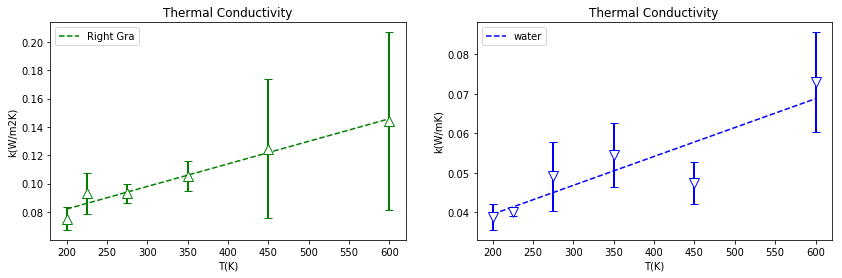

In [297]:
plot_thermalcond()

### 6.4 Boundary Conductance

In [196]:
def plot_boundarycond():
    fig = plt.figure(figsize=(10,4))
    plt.clf()
    Temp = np.array([200, 225, 275, 350])
    index = np.array([1, 2, 3])
    GL = np.zeros((np.size(Temp), np.size(index)))
    GR = np.zeros((np.size(Temp), np.size(index)))
    i=0
    for T in Temp:
        j=0
        for ind in index:
            P = 1
            dQ = 0.003
            fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(ind)+"_boundaryCond.dat"
            path='./analysisBase_prof/'+fname
            data = np.loadtxt(path)
            GL[i,j] = data[0]  
            GR[i,j] = data[1]
            j+=1
        i+=1
    GL_avg = np.mean(GL, axis=1)
    GR_avg = np.mean(GR, axis=1)
    GL_std = np.std(GL, axis=1)
    GR_std = np.std(GR, axis=1)
    
    GL_coeffs = np.polyfit(Temp, GL_avg, 1)
    GR_coeffs = np.polyfit(Temp, GR_avg, 1)
    
    f_xL = np.poly1d(GL_coeffs)
    f_xR = np.poly1d(GR_coeffs)

    plt.xlabel('T(K)')
    plt.ylabel('k(MW/m2K)')
    m2g=1
    plt.title('Thermal Boundary Conductance')
    plt.errorbar(Temp, GL_avg*m2g, yerr=GL_std, fmt='o', markerfacecolor='w', markeredgecolor='r', markersize='10', capsize =4,ecolor ='r', elinewidth=2)
    plt.errorbar(Temp, GR_avg*m2g, yerr=GR_std, fmt='^', markerfacecolor='w', markeredgecolor='g', markersize='10', capsize =4,ecolor ='g', elinewidth=2)
    
    plt.plot(Temp, f_xL(Temp)*m2g, '--', color='r', label='Left Interface')
    plt.plot(Temp, f_xR(Temp)*m2g, '--', color='g', label='Right Interface')
    plt.legend()
    
    plt.plot()
    plt.show()

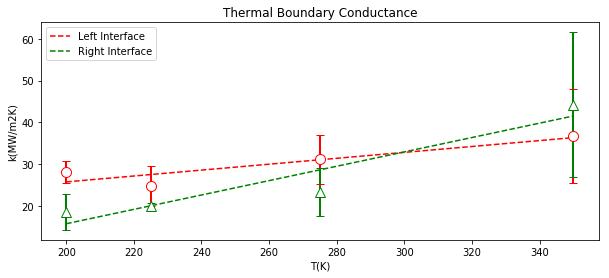

In [197]:
plot_boundarycond()

## 7. The Spectral Heat Analysis

### 7.1 Spectral heat flux



In [248]:
def plot_shc():
    import numpy as np
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(10, 4))
    plt.clf()
    
    Temp = np.array([200, 225, 275, 350, 450, 600])
    index = np.array([1, 2, 3])
    for T in Temp:
        P = 1
        dQ = 0.003
        fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_hf.dat"
        path='./analysisBase_hf/'+fname
        data = np.loadtxt(path)
        freq = data[:,0]
        SHC = data[:,1]
        plt.plot(freq, SHC, label="T=%d"%(T))
        plt.legend()
    plt.title('Thermal Heat Flux')
    plt.show()

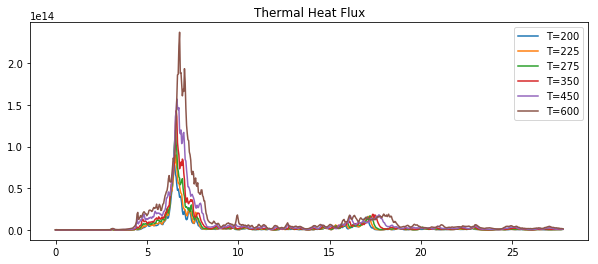

In [249]:
plot_shc()

### 7.2 Accumulated heat current.

In [303]:
def plot_accshc():
    import numpy as np
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(5, 4))
    plt.clf()
    
    Temp = np.array([200, 225, 275, 350, 450, 600])
    index = np.array([1, 2, 3])
    for T in Temp:
        P = 1
        dQ = 0.003
        fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_hf.dat"
        path='./analysisBase_hf/'+fname
        data = np.loadtxt(path)
        freq = data[:,0]
        SHC = data[:,1]
        Q_acc = np.cumsum(SHC, dtype=float)
        plt.plot(freq,Q_acc, label="T=%d"%(T))
        plt.legend()
    plt.title('Cumulative Heat flux')
    plt.show()

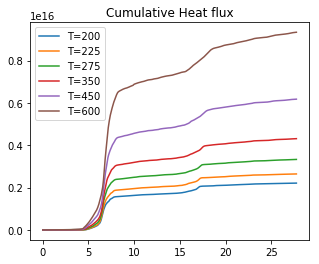

In [304]:
plot_accshc()

In [294]:
def plot_fluxVtemp():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.optimize import curve_fit
    
    fig=plt.figure(figsize=(10, 4))
    plt.clf()
    
    Temp = np.array([200, 225, 275, 350, 450, 600])
    index = np.array([1, 2, 3])
    Q_tot = np.zeros((np.size(Temp),np.size(index)))
    i=0
    for T in Temp:
        j=0
        for ind in index:
            P = 1
            dQ = 0.003
            fname="T"+str(T)+"P"+str(P)+"_dQ"+str(dQ)+"_"+str(ind)+"_hf.dat"
            path='./analysisBase_hf/'+fname
            data = np.loadtxt(path)
            freq = data[:,0]
            SHC = data[:,1]
            Q_tot[i, j] = np.sum(SHC, dtype=float)
            j+=1
        i+=1
    Q_avg = np.mean(Q_tot, axis=1)
    Q_std = np.std(Q_tot, axis=1)
    
    coeffs = np.polyfit(Temp, Q_avg, 1)
    f_x = np.poly1d(coeffs)
    
#     def func(x, a, b, c):
#         return a * np.exp(-b * x) + c
#         return  c + a/(x+b)
    
#     popt, pcov = curve_fit(func, Temp, Q_avg)
#     plt.plot(Temp, func(Temp, *popt), '--', label='optimal', color='r')
    plt.errorbar(Temp, Q_avg, yerr=Q_std, fmt='o', markersize=10, markerfacecolor='r', markeredgecolor='r', ecolor='r', elinewidth=2, capsize=4, label="T=%d"%(T))
    plt.plot(Temp, f_x(Temp), '--', color='red')
    plt.title('Cumulative Heat flux')
    plt.show()

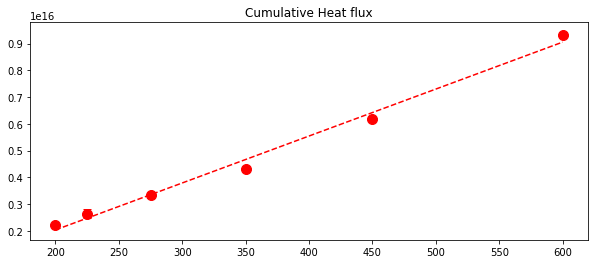

In [295]:
plot_fluxVtemp()

## 8. Alignment of molecules

### 8.1 Principal axes

In [92]:
def moment(psf, dcd):
    import MDAnalysis
    from MDAnalysis.analysis.density import density_from_Universe
    import numpy as np
    import pylab as plt
    plt.clf()
    fig = plt.figure(figsize=(10,12))

    u = MDAnalysis.Universe(psf, dcd)
    g = u.select_atoms("segid GR1")
    v = u.select_atoms("resname C6F")
    mol = v.select_atoms("resid 203")
    aC = mol.select_atoms("type C1T C2T C3T")
    aF = mol.select_atoms("type F1T F2T F3T")
    
    mol_cm = mol.center_of_mass()
    g_cm = g.center_of_mass()
    
    zl=20
    yl=20
    xl=20
    
    origin = np.array([0,0,0])
    
    # C6F principal axis
    
    pm1 = np.vstack((origin, mol.principal_axes()[0,:]))
    pm2 = np.vstack((origin, mol.principal_axes()[1,:]))
    pm3 = np.vstack((origin, mol.principal_axes()[2,:]))
    
    pm1z = mol_cm[2]+pm1[:,2]*zl
    pm1y = mol_cm[1]+pm1[:,1]*yl
    pm1x = mol_cm[0]+pm1[:,0]*xl
    
    pm2z = mol_cm[2]+pm2[:,2]*zl
    pm2y = mol_cm[1]+pm2[:,1]*yl
    pm2x = mol_cm[0]+pm2[:,0]*xl
    
    pm3z = mol_cm[2]+pm3[:,2]*zl
    pm3y = mol_cm[1]+pm3[:,1]*yl
    pm3x = mol_cm[0]+pm3[:,0]*xl
    
    #Graphene principal axis
    
    pg1 = np.vstack((origin, g.principal_axes()[0,:]))
    pg2 = np.vstack((origin, g.principal_axes()[1,:]))
    pg3 = np.vstack((origin, g.principal_axes()[2,:]))
    
    pg1z = g_cm[2]+pg1[:,2]*zl
    pg1y = g_cm[1]+pg1[:,1]*yl
    pg1x = g_cm[0]+pg1[:,0]*xl
    
    pg2z = g_cm[2]+pg2[:,2]*zl
    pg2y = g_cm[1]+pg2[:,1]*yl
    pg2x = g_cm[0]+pg2[:,0]*xl
    
    pg3z = g_cm[2]+pg3[:,2]*zl
    pg3y = g_cm[1]+pg3[:,1]*yl
    pg3x = g_cm[0]+pg3[:,0]*xl
    
    # Position of atoms in C6F
    
    x_m = mol.positions[:,0]
    y_m = mol.positions[:,1]
    z_m = mol.positions[:,2]
    
    x_aC = aC.positions[:,0]
    y_aC = aC.positions[:,1]
    z_aC = aC.positions[:,2]
    
    x_aF = aF.positions[:,0]
    y_aF = aF.positions[:,1]
    z_aF = aF.positions[:,2]
    
# Position of atoms in Graphene
    
    x_g = g.positions[:,0]
    y_g = g.positions[:,1]
    z_g = g.positions[:,2]
    
    
    ax = fig.add_subplot(3,2,1)
    plt.scatter(z_aC, y_aC, s=30)
    plt.scatter(z_aF, y_aF, s=10)
    plt.scatter(z_g, y_g, s=10)
    
    ax = fig.add_subplot(3,2,2)
    
    plt.scatter(z_aC, x_aC, s=30)
    plt.scatter(z_aF, x_aF, s=10)
    plt.scatter(z_g, x_g, s=10)
    
    ax = fig.add_subplot(3,2,3)
    
    plt.plot(pm1z, pm1y, label='p1')
    plt.plot(pm2z, pm2y, label='p2')
    plt.plot(pm3z, pm3y, label='p3')
    
    plt.plot(pg1z, pg1y, '--', label='p1')
    plt.plot(pg2z, pg2y, '--', label='p2')
    plt.plot(pg3z, pg3y, '--', label='p3')
    plt.xlabel("Z")
    plt.ylabel("Y")
    plt.legend()
    
    ax = fig.add_subplot(3,2,4)
    
    plt.plot(pm1z, pm1x, label='p1')
    plt.plot(pm2z, pm2x, label='p2')
    plt.plot(pm3z, pm3x, label='p3')
    
    plt.plot(pg1z, pg1x, '--', label='p1')
    plt.plot(pg2z, pg2x, '--', label='p2')
    plt.plot(pg3z, pg3x, '--', label='p3')
    plt.xlabel("Z")
    plt.ylabel("X")
    plt.legend()
    
    ax = fig.add_subplot(3,2,5)
    
    plt.scatter(x_aC, y_aC, s=30)
    plt.scatter(x_aF, y_aF, s=10)
    plt.scatter(x_g, y_g, s=10)
    
    ax = fig.add_subplot(3,2,6)
    
    plt.plot(pm1x, pm1y, label='p1')
    plt.plot(pm2x, pm2y, label='p2')
    plt.plot(pm3x, pm3y, label='p3')
    
    plt.plot(pg1x, pg1y, '--', label='p1')
    plt.plot(pg2x, pg2y, '--', label='p2')
    plt.plot(pg3x, pg3y, '--', label='p3')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()

    plt.show()

<Figure size 432x288 with 0 Axes>

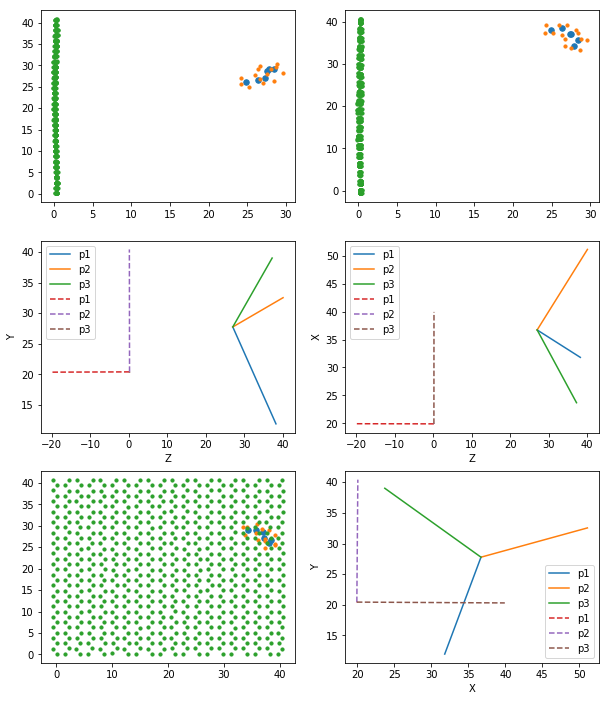

In [93]:
moment('T200P1_dQ0.003_1/inputFiles/c6fGra.psf', 'T200P1_dQ0.003_1/outputFiles/c6fGra.dcd')

In [108]:
def plot_paxes3d(psf, dcd):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(10,10))

    import MDAnalysis
    import numpy as np

    u = MDAnalysis.Universe(psf, dcd)
    g = u.select_atoms("segid GR1")
    v = u.select_atoms("resname C6F")
    mol = v.select_atoms("resid 203")
    aC = mol.select_atoms("type C1T C2T C3T")
    aF = mol.select_atoms("type F1T F2T F3T")

    mol_cm = mol.center_of_mass()
    g_cm = g.center_of_mass()

    zl=10
    yl=10
    xl=10

    origin = np.array([0,0,0])

    # C6F principal axis

    pm1 = np.vstack((origin, mol.principal_axes()[0,:]))
    pm2 = np.vstack((origin, mol.principal_axes()[1,:]))
    pm3 = np.vstack((origin, mol.principal_axes()[2,:]))

    pm1z = mol_cm[2]+pm1[:,2]*zl
    pm1y = mol_cm[1]+pm1[:,1]*yl
    pm1x = mol_cm[0]+pm1[:,0]*xl

    pm2z = mol_cm[2]+pm2[:,2]*zl
    pm2y = mol_cm[1]+pm2[:,1]*yl
    pm2x = mol_cm[0]+pm2[:,0]*xl

    pm3z = mol_cm[2]+pm3[:,2]*zl
    pm3y = mol_cm[1]+pm3[:,1]*yl
    pm3x = mol_cm[0]+pm3[:,0]*xl

    #Graphene principal axis

    pg1 = np.vstack((origin, g.principal_axes()[0,:]))
    pg2 = np.vstack((origin, g.principal_axes()[1,:]))
    pg3 = np.vstack((origin, g.principal_axes()[2,:]))

    # Position of atoms in C6F

    x_m = mol.positions[:,0]
    y_m = mol.positions[:,1]
    z_m = mol.positions[:,2]

    x_aC = aC.positions[:,0]
    y_aC = aC.positions[:,1]
    z_aC = aC.positions[:,2]

    x_aF = aF.positions[:,0]
    y_aF = aF.positions[:,1]
    z_aF = aF.positions[:,2]

    #Position of atoms in Graphene

    x_g = g.positions[:,0]
    y_g = g.positions[:,1]
    z_g = g.positions[:,2]

    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(z_aC, y_aC, x_aC)
    ax.scatter(z_aF, y_aF, x_aF)
    ax.scatter(z_g, y_g, x_g)
    ax.plot(pm1z, pm1y, pm1x)
    ax.plot(pm2z, pm2y, pm2x)
    ax.plot(pm3z, pm3y, pm3x)

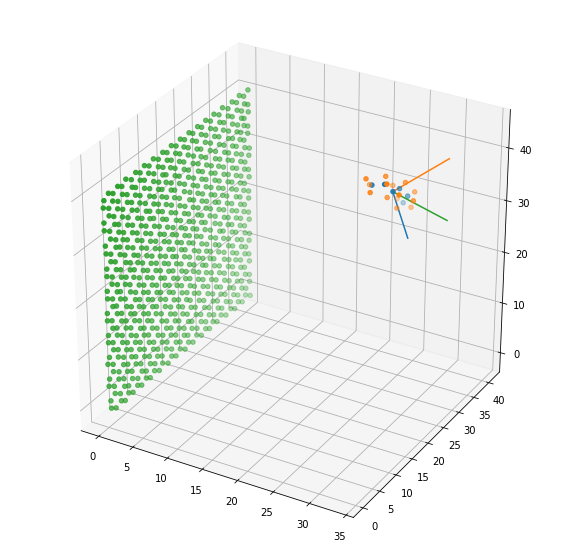

In [109]:
plot_paxes3d('T200P1_dQ0.003_1/inputFiles/c6fGra.psf', 'T200P1_dQ0.003_1/outputFiles/c6fGra.dcd')

### 8.2 Root Mean Square Deviation (RMSD)

In [224]:
def rmsd(psf, dcd, pdb):
    
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(18,8))

    import MDAnalysis as mda
    from MDAnalysis.analysis.rms import rmsd
    import numpy as np
    import nglview as nv

    u = mda.Universe(psf, dcd)
    r = mda.Universe(pdb)
    r_c6f = r.select_atoms("resname C6F")
    r_mol1 = r_c6f.select_atoms("resid 1")
    r_mol2 = r_c6f.select_atoms("resid 43")
    r_mol3 = r_c6f.select_atoms("resid 156")
    g = u.select_atoms("segid GR1")
    c6f = u.select_atoms("resname C6F")
    mol1 = c6f.select_atoms("resid 1")
    mol2 = c6f.select_atoms("resid 43")
    mol3 = c6f.select_atoms("resid 156")
    aC = mol.select_atoms("type C1T C2T C3T")
    aF = mol.select_atoms("type F1T F2T F3T")
    
    D_pure_rot=[]
    D_full=[]

    for ts in u.trajectory[0:-1:1]:
        D_pure_rot.append((ts.time/1e5, rmsd(mol1.positions, r_mol1.positions, center=True),
                          rmsd(mol2.positions, r_mol2.positions, center=True),
                          rmsd(mol3.positions, r_mol3.positions, center=True)))
        D_full.append((ts.time/1e5, rmsd(mol1.positions, r_mol1.positions),
                      rmsd(mol2.positions, r_mol2.positions),
                      rmsd(mol3.positions, r_mol3.positions)))
    
    D_pure_rot=np.array(D_pure_rot)
    D_full=np.array(D_full)
    
    ax = fig.add_subplot(2,1,1)
    ax.set_ylim(0, 50)
    plt.plot(D_pure_rot[:,0], D_pure_rot[:,1])
    plt.plot(D_pure_rot[:,0], D_pure_rot[:,2])
    plt.plot(D_pure_rot[:,0], D_pure_rot[:,3])
    
    ax = fig.add_subplot(2,1,2)
    ax.set_ylim(0, 50)
    plt.plot(D_full[:,0], D_full[:,1])
    plt.plot(D_full[:,0], D_full[:,2])
    plt.plot(D_full[:,0], D_full[:,3])
    
    plt.show()
    

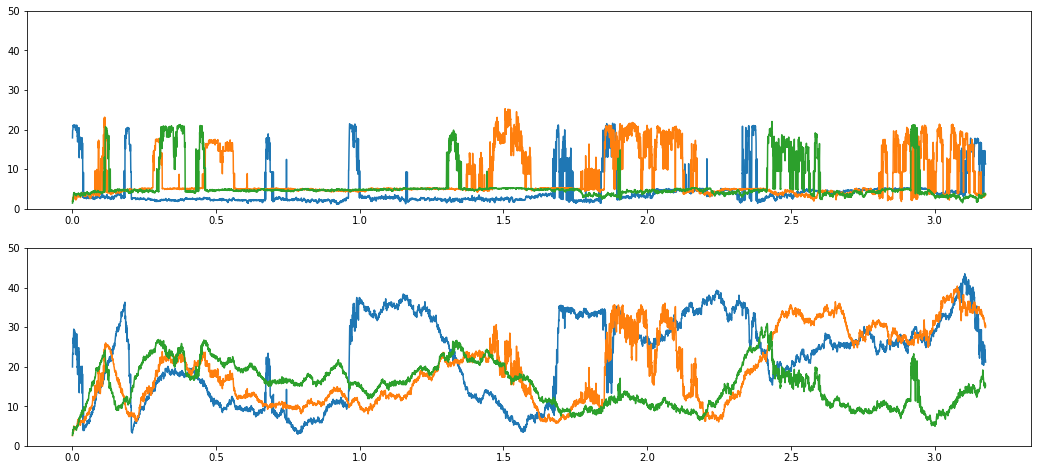

In [225]:
rmsd('T200P1_dQ0.003_1/inputFiles/c6fGra.psf', 'T200P1_dQ0.003_1/outputFiles/c6fGra.dcd', 'T200P1_dQ0.003_1/inputFiles/c6fGra.pdb')

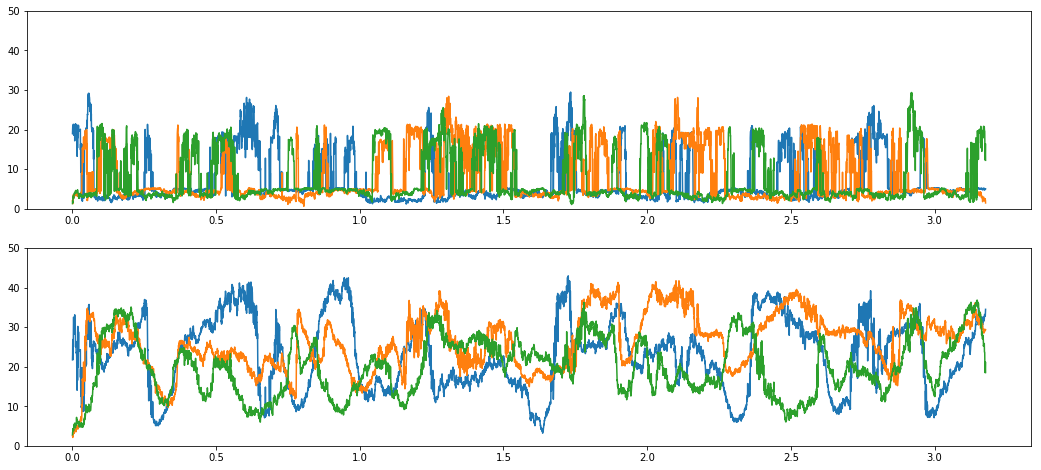

In [226]:
rmsd('T450P1_dQ0.003_1/inputFiles/c6fGra.psf', 'T450P1_dQ0.003_1/outputFiles/c6fGra.dcd', 'T450P1_dQ0.003_1/inputFiles/c6fGra.pdb')

### 8.3 First order legandre polynomial

$$ P = \Big\langle \frac{3}{2}cos(\theta)-\frac{1}{2} \Big\rangle$$


REF: [Lower Limit of Interfacial Thermal Resistance across the Interface between an Imidazolium Ionic Liquid and Solid Surface](https://pubs.acs.org/doi/pdf/10.1021/acs.jpcc.8b06974),  Cheng Qian et al. (2018)

In [238]:
import matplotlib.pyplot as plt
from sympy.physics.vector import *
import math
import MDAnalysis
import numpy as np

def plot_Pleg(psf, dcd):
    N = ReferenceFrame('N')
    
    fig = plt.figure(figsize=(10,4))

    u = MDAnalysis.Universe(psf, dcd)
    g = u.select_atoms("segid GR1")
    v = u.select_atoms("resname C6F")
    mol1 = v.select_atoms("resid 1")
    mol2 = v.select_atoms("resid 43")
    mol3 = v.select_atoms("resid 156")

    t=[]
    for ts in u.trajectory[2000:2500]:
        mol1_p = mol1.principal_axes()
        mol2_p = mol2.principal_axes()
        mol3_p = mol3.principal_axes()
        g_p = g.principal_axes()

        v = []
        for i in range(3):
            v.append((N.x*mol1_p[i,0]+N.y*mol1_p[i,1]+N.z*mol1_p[i,2],
                    N.x*mol2_p[i,0]+N.y*mol2_p[i,1]+N.z*mol2_p[i,2],
                    N.x*mol3_p[i,0]+N.y*mol3_p[i,1]+N.z*mol3_p[i,2]))
        v = np.array(v)
        r_mol1 = v[0,0]+v[1,0]+v[2,0]
        r_mol2 = v[0,1]+v[1,1]+v[2,1]
        r_mol3 = v[0,2]+v[1,2]+v[2,2]
        v = []
        for i in range(3):
            v.append(N.x*g_p[i,0]+N.y*g_p[i,1]+N.z*g_p[i,2])
        v = np.array(v)
        r_g = v[0]+v[1]+v[2]
        cos_theta1 = (r_mol1.dot(r_g))/(r_mol1.magnitude()*r_g.magnitude())
        cos_theta2 = (r_mol2.dot(r_g))/(r_mol2.magnitude()*r_g.magnitude())
        cos_theta3 = (r_mol3.dot(r_g))/(r_mol3.magnitude()*r_g.magnitude())
        t.append((u.trajectory.time, cos_theta1, cos_theta2, cos_theta3))
    t = np.array(t)
    p1 = (3.0/2.0)*np.square(t[:,1])-(1.0/2.0)
    p2 = (3.0/2.0)*np.square(t[:,2])-(1.0/2.0)
    p3 = (3.0/2.0)*np.square(t[:,3])-(1.0/2.0)
    p1_sum = np.cumsum(p1)
    p2_sum = np.cumsum(p2)
    p3_sum = np.cumsum(p3)
    f = np.arange(1,np.size(p)+1,1)
    p1_mean = p1_sum/f 
    p2_mean = p2_sum/f 
    p3_mean = p3_sum/f 
    plt.plot(t[:,0]/1e3, p1_mean, label='resid 1')
    plt.plot(t[:,0]/1e3, p2_mean, label='resid 43')
    plt.plot(t[:,0]/1e3, p3_mean, label='resid 156')
    plt.legend()
    plt.show()

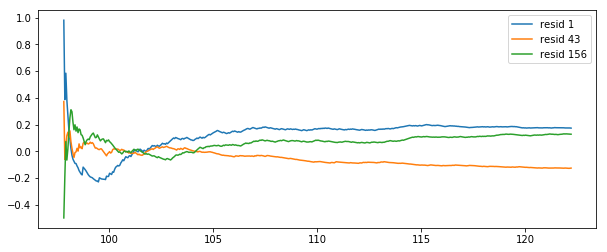

In [239]:
plot_Pleg('T200P1_dQ0.003_1/inputFiles/c6fGra.psf', 'T200P1_dQ0.003_1/outputFiles/c6fGra.dcd')

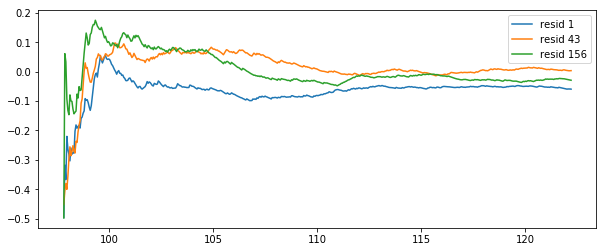

In [240]:
plot_Pleg('T450P1_dQ0.003_1/inputFiles/c6fGra.psf', 'T450P1_dQ0.003_1/outputFiles/c6fGra.dcd')